<a href="https://colab.research.google.com/github/a01137646/MNA_Public/blob/main/SVM_Equipo49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Gerardo Aaron Castañeda Jaramillo - A01137646
* Dalina Aidee Villa Ocelotl - A01793258
* Yocelin Juárez Arroyo - A00819828
* Victor Hugo Avila Felipe - A01794425


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.dummy import DummyClassifier

from sklearn import svm

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, StratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, make_scorer

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, precision_recall_curve

In [ ]:
mypath = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"

data = pd.read_csv(mypath, sep=" ", header=None)

data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']

print(data.shape)
data.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
Y = data[['class']]
X = data.drop(labels='class',axis=1)

#**Ejercicio-1.** 

Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0. 

In [ ]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=0)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(586, 14) : dimensión de datos de entrada para entrenamiento y validación
(104, 14) : dimensión de datos de entrada para prueba
(586, 1) : dimensión de variable de salida para entrenamiento y validación
(104, 1) : dimensión de variable de salida para prueba


#**Ejercicio-2.**

Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información

Observando lo que nos dice la documentación:
* A1:	0,1    CATEGORICAL a,b
* A2:	continuous.
* A3:	continuous.
* A4:	1,2,3         CATEGORICAL p,g,gg
* A5:  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x 
* A6:	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL ff,dd,j,bb,v,n,o,h,z 
* A7:	continuous.
* A8:	1, 0       CATEGORICAL t, f.
* A9: 1, 0	    CATEGORICAL t, f.
* A10:	continuous.
* A11:  1, 0	    CATEGORICAL t, f.
* A12:    1, 2, 3    CATEGORICAL s, g, p 
* A13:	continuous.
* A14:	continuous.
* A15:   1,2 +,-         (class attribute)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  class   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [ ]:
data.isnull().values.any()

False

Definimos variables por sus tipos en base a la documentación:

In [ ]:
#definimos variables numéricas
num_nom = ['A2','A3','A7','A10','A13','A14']
#definimos variables categóricas
cat_nom = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

Observamos la frecuencia de cada nivel de las variables categóricas:

In [ ]:
for col in cat_nom:
  print(data[col].value_counts(),'\n')

1    468
0    222
Name: A1, dtype: int64 

2    525
1    163
3      2
Name: A4, dtype: int64 

8     146
11     78
9      64
3      59
6      54
1      53
4      51
13     41
14     38
7      38
2      30
10     25
5      10
12      3
Name: A5, dtype: int64 

4    408
8    138
5     59
1     57
3      8
9      8
2      6
7      6
Name: A6, dtype: int64 

1    361
0    329
Name: A8, dtype: int64 

0    395
1    295
Name: A9, dtype: int64 

0    374
1    316
Name: A11, dtype: int64 

2    625
1     57
3      8
Name: A12, dtype: int64 



Observamos que algunos efectivamente, tienen niveles muy bajos. Una regla empírica para esto es que sean al menos 5% de la información. Así que transformamos aquellos que no lo cumplen. 

Una función para remplazar valores menores a cierto porcentaje del total de información con otro valor, para así poder agrupar: 

In [ ]:
def freq_group(df,n,tres):
  x = df.copy()
  for indx in x.value_counts().index.tolist():
    if (x.value_counts()[indx]/x.value_counts().sum()) < tres:
      x = x.replace(to_replace=indx,value=n)
  return x

Vemos específicamente cada caso, y hacemos sus sustituciones: 

In [ ]:
#agrupamos todos los menores a 5% en un solo grupo
for var in ['A4','A5','A6','A12']:
  data[var] = freq_group(data[var],0,0.05)

Observamos la frecuencia de cada nivel de las variables categóricas:

In [ ]:
for col in cat_nom:
  print(data[col].value_counts(),'\n')

1    468
0    222
Name: A1, dtype: int64 

2    525
1    163
0      2
Name: A4, dtype: int64 

8     146
11     78
0      68
9      64
3      59
6      54
1      53
4      51
13     41
14     38
7      38
Name: A5, dtype: int64 

4    408
8    138
5     59
1     57
0     28
Name: A6, dtype: int64 

1    361
0    329
Name: A8, dtype: int64 

0    395
1    295
Name: A9, dtype: int64 

0    374
1    316
Name: A11, dtype: int64 

2    625
1     57
0      8
Name: A12, dtype: int64 



Observamos las variables numéricas:

In [ ]:
data[num_nom].describe()

,A2,A3,A7,A10,A13,A14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000


Graficamos los histogramas de la variables numéricas con sus posibles transformaciones:

In [ ]:
def Sqrt_cx(x):
  c = x.max()
  tmp = np.power(c+1-x,1/2)
  return tmp

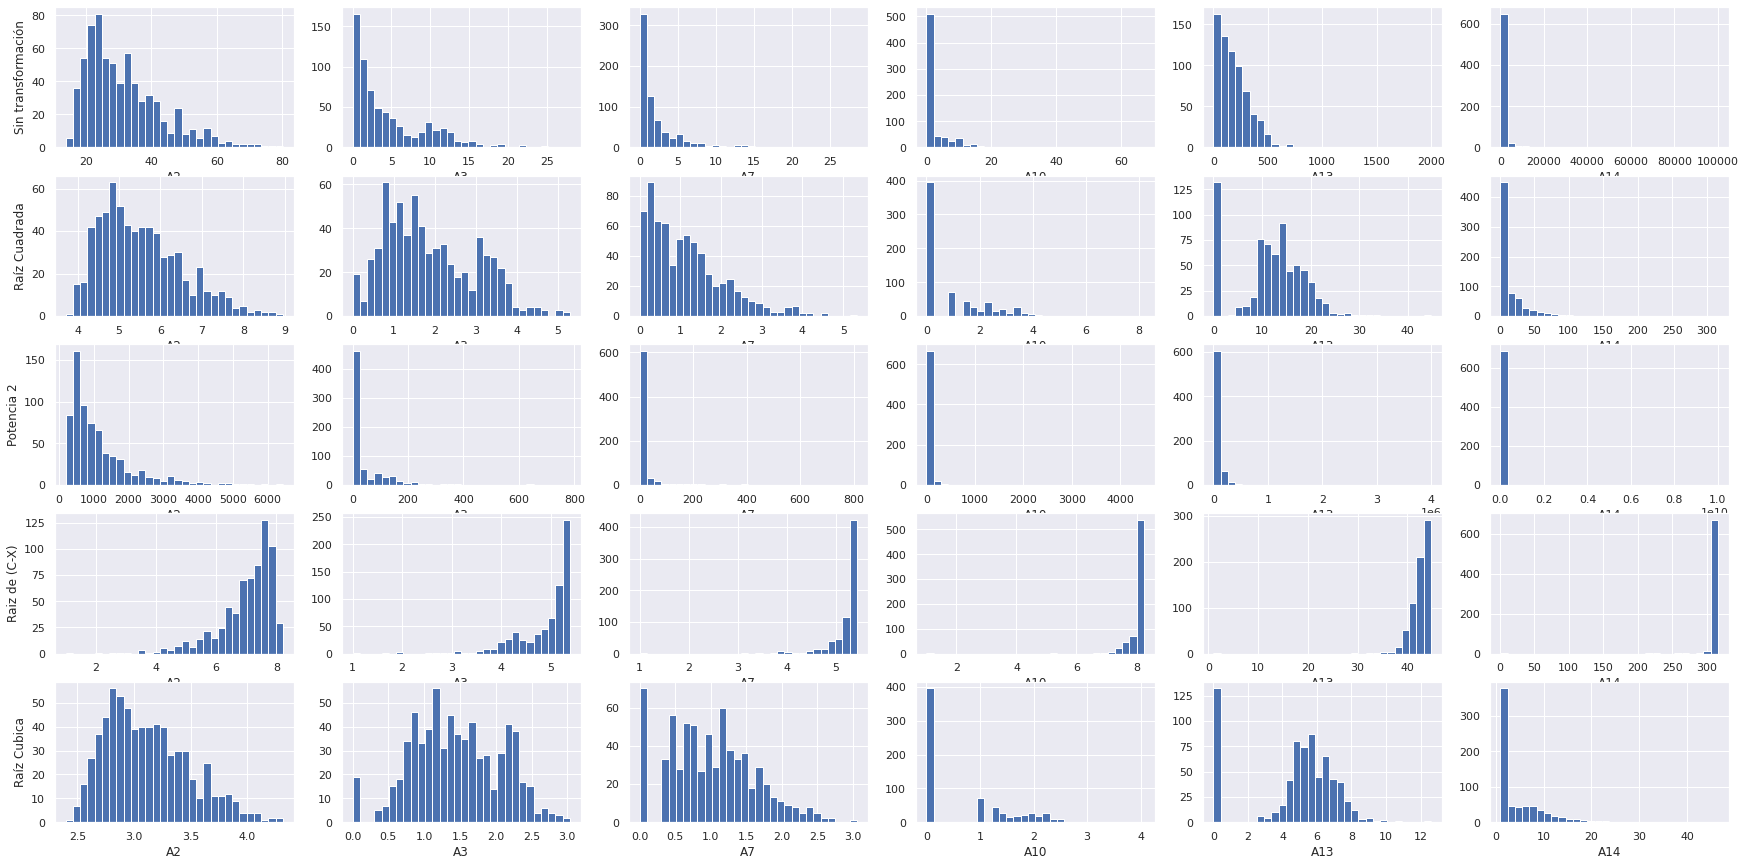

In [ ]:
df_transform = data[num_nom]
nvar = len(data[num_nom].columns)
nplots = 5
sns.set(rc={'figure.figsize':(nvar*5,15)})
k=0
fig, axes = plt.subplots(nplots, nvar)   
for k in range(0,nvar):  
  plt.subplot(nplots, nvar,k+1) 

  Transf0 = df_transform.iloc[:,k].to_numpy().reshape(-1, 1) 
  plt.hist(Transf0, bins=30) 
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Sin transformación')
  
  plt.subplot(nplots, nvar,k+1+nvar*1)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=30)                      
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(nplots, nvar,k+1+nvar*2)  
  Transf2 = np.power(Transf0,2)     
  plt.hist(Transf2, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Potencia 2')

  plt.subplot(nplots, nvar,k+1+nvar*3)    
  Transf3 = Sqrt_cx(df_transform.iloc[:,k])        
  plt.hist(Transf3, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Raiz de (C-X)')  

  plt.subplot(nplots, nvar,k+1+nvar*4)  
  Transf4 = np.power(Transf0,1/3)     
  plt.hist(Transf4, bins=30)                   
  plt.xlabel(df_transform.columns[k])
  if k==0:
    plt.ylabel('Raíz Cubica')

Donde observamos que, aunque existe para A10, A13 y A14 existe un gran numero de valores de valor 1, la transformación que mejor distribución nos da es la raíz cubica

Verificamos que no existan clases desbalanceadas en y:

In [ ]:
data['class'].sum() / data['class'].shape[0]

0.4449275362318841

Finalmente, creamos nuestro pipeline con todas nuestras transformaciones y escalamiento:

In [ ]:
def x_tran(X):
  X_ = X.copy() 
  X_ = np.power(X_,1/3)    
  return X_

In [ ]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('CubicRoot', FunctionTransformer(x_tran)),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
#catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder())])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

Dado que se hicieron cambios en el dataframe de ‘data’ para eliminar valores categóricos debajo del 5%, se vuelve a particionar el dataset

In [ ]:
X = data.iloc[:,:-1]  
Y = data.iloc[:,-1]

In [ ]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, random_state=0)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  
print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(586, 14) : dimensión de datos de entrada para entrenamiento y validación
(104, 14) : dimensión de datos de entrada para prueba
(586,) : dimensión de variable de salida para entrenamiento y validación
(104,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las
siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar
la estrategia “stratified” en este caso? 


In [ ]:
#creamos el modelo dummy
dummy_class = DummyClassifier(strategy='stratified')

#transformamos los datos en X
Xct = columnasTransformer.fit(Xtv)
Xtvt = Xct.transform(Xtv)
Xpt = Xct.transform(Xtest)

#entrenamos el modelo
dummy_class.fit(Xtvt, np.ravel(ytv))

DummyClassifier(strategy='stratified')

Utilizamos ‘stratified’ porque indica al modelo que sus predicciones sean sobre la base de la distribución de clases del conjunto de datos de entrenamiento. En este caso, genera para nuestra clase ‘1’ una probabilidad cercana al 44% en base a lo visto previamente en nuestro set de entrenamiento. 

In [ ]:
#realizamos las predicciones
yhat = dummy_class.predict(Xtvt)

print('Accuracy:', accuracy_score(ytv,yhat))
print('f1_score:', f1_score(ytv,yhat))
print('Precision:', precision_score(ytv,yhat))
print('Recall:', recall_score(ytv,yhat))

Accuracy: 0.49658703071672355
f1_score: 0.45065176908752325
Precision: 0.4384057971014493
Recall: 0.46360153256704983


Lo cual se reafirma con las métricas de score al tener todas valores cercanos a esa probabilidad. 

#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior

In [ ]:
#desactivamos warnings porque métrica precisión levanta warning de utilizar zero_division = 0 en gridsearch
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#obtenemos el modelo y los parámetros
modeloSVM_iter = svm.SVC()
cvSVM = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

dicc_grid = [
              {'C':[0.01, 0.1, 1, 10, 100, 1000], 
               'gamma':[1, 0.1, 0.01, 0.001, 0.0001,'scale','auto'],
               'kernel':['linear','poly','rbf','sigmoid'],
               'class_weight':['balanced',None]}
             ]

scoring = ['accuracy','f1','precision','recall']

grid = GridSearchCV(estimator=modeloSVM_iter, 
                    param_grid=dicc_grid, 
                    cv=cvSVM, 
                    scoring=scoring,
                    refit='accuracy',
                    n_jobs=-1,
                    error_score='raise')

In [ ]:
grid.fit(Xtvt, np.ravel(ytv))

print('Mejor valor de accuracy obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)
print('Mejor Index:',grid.best_index_)     #obtenemos el índice sobre la corrida con el mejor promedio de su cross validation para f1-score

Mejor valor de accuracy obtenido con la mejor combinación: 0.8578202713795934
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.01, 'class_weight': None, 'gamma': 1, 'kernel': 'linear'}
Métrica utilizada: ['accuracy', 'f1', 'precision', 'recall']
Mejor Index: 28


In [ ]:
#reactivamos warnings
warnings.filterwarnings('always')

El método de gridsearchCV nos arroja todos los valores de todas las métricas que corre para todos los parámetros. Por lo que es posible obtener de una sólida corrida del método los máximos de cada métrica, y sus respectivos hiperparametros:

In [ ]:
max_resultados = list() 
max_indexes = list()
max_params = list()
scores = ['accuracy','f1','precision','recall']
for score in scores:
  resultados_mean = list()     #lista para guardar los valores de las métricas
  index = np.argmin(grid.cv_results_['rank_test_' + score])
  max_indexes.append(index)
  max_params.append(grid.cv_results_['params'][index])
  for score in scores:
    resultados_mean.append(grid.cv_results_['mean_test_' + score][index])
  max_resultados.append(resultados_mean)

Y desplegamos los hiperparametros, sus índices, y los resultados de cada métrica, para el máximo de cada metrica

In [ ]:
i = 0
for score in scores:
  j = 0
  print(score, 'mejores parámetros:', max_params[i], 'indice:', max_indexes[i])
  for score2 in scores:
    print(score2, ':', max_resultados[i][j])
    j = j + 1
  i = i + 1

accuracy mejores parámetros: {'C': 0.01, 'class_weight': None, 'gamma': 1, 'kernel': 'linear'} indice: 28
accuracy : 0.8578202713795934
f1 : 0.8401362280150738
precision : 0.8410450649898584
recall : 0.8416787614900823
f1 mejores parámetros: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'} indice: 182
accuracy : 0.8526534357042832
f1 : 0.8498209422242304
precision : 0.7795975338002114
recall : 0.9348814707305272
precision mejores parámetros: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'} indice: 58
accuracy : 0.7030856149500216
f1 : 0.5119387990940171
precision : 0.916370011253288
recall : 0.37428640541848085
recall mejores parámetros: {'C': 1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'linear'} indice: 112
accuracy : 0.8492298034670916
f1 : 0.8472060572071783
precision : 0.7737037607316277
recall : 0.9373971940009673


Entrenamos modelo con hiperparametros para el mejor resultado de accuracy:

In [ ]:
#entrenamos modelo con hiperparametros y calculamos errores
modelo_SVM = svm.SVC(C=grid.best_params_['C'],
                      gamma=grid.best_params_['gamma'],
                      kernel=grid.best_params_['kernel'],
                      class_weight=grid.best_params_['class_weight'],
                      probability = True)   #se le agrega para ejercicio 8 donde se ocupa predict_proba()

modelo_SVM.fit(Xtvt, np.ravel(ytv))

SVC(C=0.01, gamma=1, kernel='linear', probability=True)

Calculamos los errores para el conjunto de prueba:

In [ ]:
#realizamos las predicciones
yhat = modelo_SVM.predict(Xpt)

print('Accuracy:', accuracy_score(ytest,yhat))
print('f1_score:', f1_score(ytest,yhat))
print('Precision:', precision_score(ytest,yhat))
print('Recall:', recall_score(ytest,yhat))

Accuracy: 0.8653846153846154
f1_score: 0.8444444444444444
Precision: 0.8636363636363636
Recall: 0.8260869565217391


#**Ejercicio-5.**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones. 

Generamos listas con los valores de cada métrica en cada split del crossvalidation en el gridsearch, para tener los valores necesarios para generar un diagrama de bigotes:

In [ ]:
nom_resultados_todos = list() #lista para guardiar las listas, de las listas con los valores de la metrica
for index_up in max_indexes:
  nom_resultados = list()    #lista para guardar las listas con los valores de las métrica
  index = index_up  #obtenemos el índice que dio la mejor métrica
  scores = ['accuracy','f1','precision','recall']   #nombres de las métricas
  for score in scores:
    resultados = list()     #lista para guardar los valores de las métricas
    for i in range(15):
      resultados.append(grid.cv_results_['split' + str(i) + '_test_' + score][index])
    nom_resultados.append(resultados)
  nom_resultados_todos.append(nom_resultados)

Confirmamos que estemos calculando correctamente las métricas, comparando con los 'mean_test' del gridsearch:

In [ ]:
#confirmamos que estemos calculando correctamente las metricas, comparando con los 'mean_test' del gridsearch
i = 0
for i in range(len(scores)):
  print(scores[i] + ':', np.mean(nom_resultados_todos[0][i]))
  i = i + 1

accuracy: 0.8578202713795934
f1: 0.8401362280150738
precision: 0.8410450649898584
recall: 0.8416787614900823


Y finalmente las graficamos:

Boxplot para mejores parametros de mejor resultado de accuracy


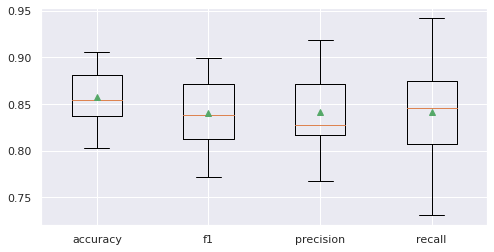

Boxplot para mejores parametros de mejor resultado de f1


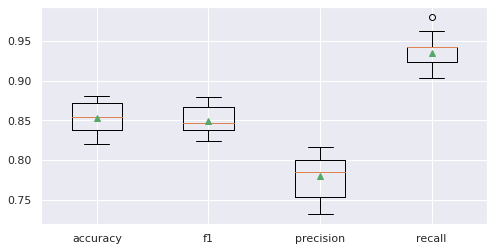

Boxplot para mejores parametros de mejor resultado de precision


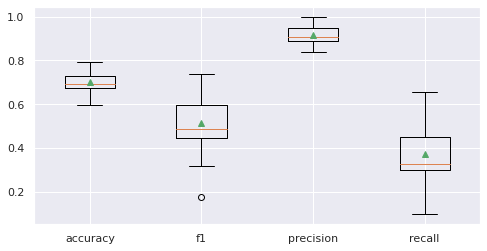

Boxplot para mejores parametros de mejor resultado de recall


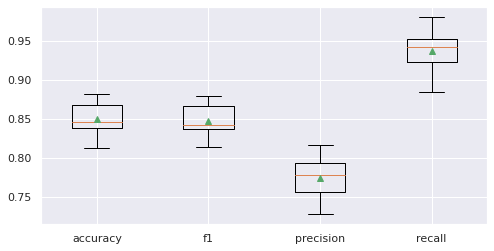

In [ ]:
i = 0
for score in scores:
  print('Boxplot para mejores parametros de mejor resultado de', score)
  sns.set(rc={'figure.figsize':(8,4)})
  plt.boxplot(nom_resultados_todos[i], labels=scores, showmeans=True)
  plt.show()
  i = i + 1

Observando los boxplots de los hiperparametros para el mejor resultado de:
* accuracy podemos ver que todos dan resultados aceptables, aunque su varianza es un poco alta, especialmente para recall
* f1-score podemos ver que la varianza en todos es baja, y que el valor de recall es especialmente alto. Sin embargo, el valor promedio de precision baja de 0.8
* precision podemos ver que la varianza para acurracy y para precision son muy bajas, y que el valor promedio de precision es especialmente alto. Sin embargo, los valores promedios de las otras 3 métricas son muy bajos
* recall podemos ver que recall llega alto, y que las varianzas de los 4 son bajas. Sini embargo precision es bajo.

Por lo que decidimos quedarnos con los hiperparametros para el mejor resultado de accuracy, ya que son los que sus valores son consistentes en las 4 métricas como aceptables. 


#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas. 


Primero corremos la curva de aprendizaje aumentando el tamaño del conjunto:

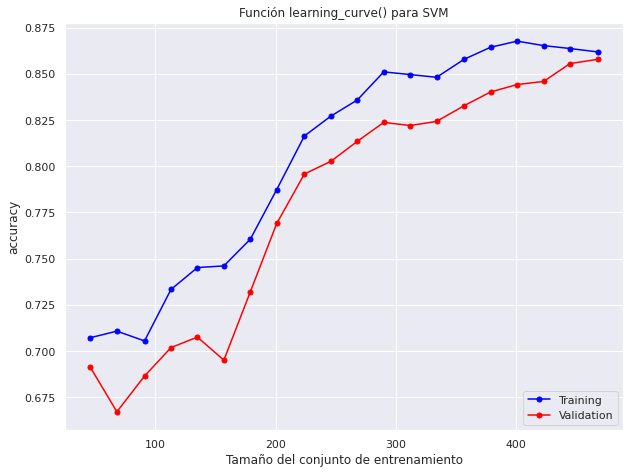

In [ ]:
#obtenemos el modelo y los parametros de cross validation
modeloLC = modelo_SVM
cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
#definimos los al menos 20 puntos de particion
delta_train_sz = np.linspace(0.1, 1.0, 20)

#obtenemos los datos de X transformados
Xx = Xtvt

#obtenemos la learning curve
train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring='accuracy')     #utilizamos f1 como métrica

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

sns.set(rc={'figure.figsize':(10,7.5)})

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve() para ' + 'SVM')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

A primera vista, observamos que entre mayor el conjunto de entrenamiento, mejor el accuracy. Así mismo, el sesgo entre entrenamiento y validación es mínimo. Por lo que parece ser un buen modelo, que no esta subentrenado ni sobrentrenado. 

Seguido, creamos la curva de aprendizaje variando el parámetro C: 

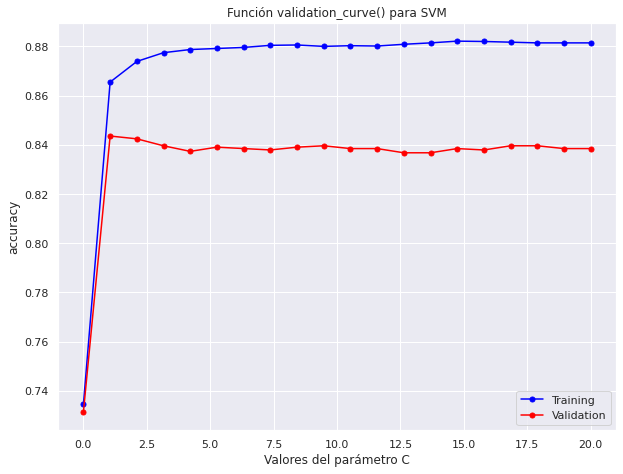

In [ ]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = modelo_SVM
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

delta_C = np.linspace(0.001, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xx, 
                                              np.ravel(ytv), 
                                              param_name="C", 
                                              param_range=delta_C,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para ' + 'SVM')
plt.xlabel('Valores del parámetro C')
plt.ylabel('accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Donde lo primero a observar es que, al aumentar el valor de C, aumenta el sesgo. El cual luego se mantiene constante.

Seguido, creamos la curva de aprendizaje variando el parámetro gamma: 

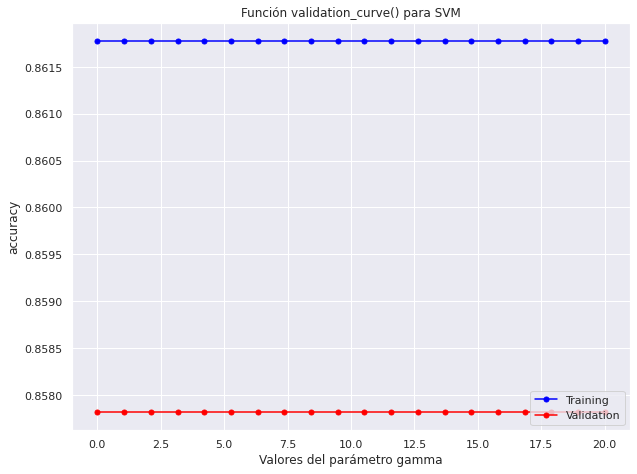

In [ ]:
#obtenemos el modelo y los parametros de cross validation
modeloVC = modelo_SVM
cvVC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

delta_gamma = np.linspace(0.001, 20, 20)

train_scores, valid_scores = validation_curve(modeloVC, 
                                              Xx, 
                                              np.ravel(ytv), 
                                              param_name="gamma", 
                                              param_range=delta_gamma,
                                              cv=cvVC,
                                              scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve() para ' + 'SVM')
plt.xlabel('Valores del parámetro gamma')
plt.ylabel('accuracy')
plt.grid(b=True)
plt.legend(loc='lower right')
plt.show()

Donde observamos que gamma no esta teniendo ningún efecto en el sesgo del modelo. 

Sabemos que entre mas disminuya el valor de C, mas “se contrae” la frontera de vectores de soporte, por lo que estos últimos generalmente aumentan.  Así mismo, sabemos que entre mas grande se hace gamma, suelen generarse mas irregularidades en las fronteras separadoras, y va aumentando el sobreentrenamiento. 

Concluyendo así, de las ultimas dos gráficas, que el parámetro que este caso tiene mayor influencia es el de C. Donde nuestro hiperparametro es el de C=0.01. Observando la grafica vemos que el menor sesgo es para cuando C es menor. Así que nos quedamos con C=0.01.

#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva. 

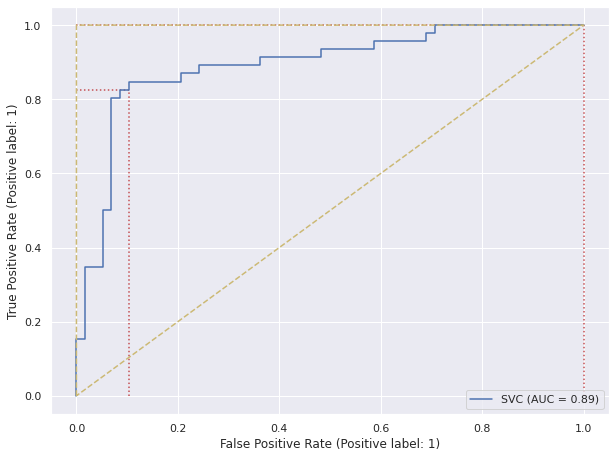

In [ ]:
# Obtenemos las predicciones del modelo:
yhat = modelo_SVM.predict(Xpt)

# Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
fpr, tpr, thresholds = metrics.roc_curve(ytest, yhat)

metrics.RocCurveDisplay.from_estimator(modelo_SVM, Xpt, ytest)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')

plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
plt.show() 

Donde observamos una área bajo la curva de 0.89

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score. 


In [ ]:
# regresa los TP para un umbral deseado:
def fun_thTPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)   # shape (231x2)
  my1s = (y['class']==1) 
  pred1s  = p[my1s][:,1]
  return (pred1s > th).sum() / my1s.sum()

In [ ]:
# Análogo ahora con los FP:
def fun_thFPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)
  my0s = (y['class']==0) 
  pred0s  = p[my0s][:,1]
  return (pred0s>th).sum() / my0s.sum()

Utilizamos el método de precision_recall_curve() para obtener los valores de precision, recall, y sus respectivos thresholds:

In [ ]:
# Obtenemos las predicciones del modelo:
yhat = modelo_SVM.predict_proba(Xpt)
yhat = yhat[:, 1]

# Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr) y los thresholds:
precision, recall, thresholds = precision_recall_curve(ytest, yhat)

Conociendo la formula de f1_score, obtenemos los valores de f1_score de cada threshold, y obtenemos el mayor. Utilizando este threshold que nos da el máximo de nuestro f1_score, generamos el true positive rate, y el false positive rate con las funciones definidas arriba:

In [ ]:
# se obtienen los threshold
f1score = (2 * precision * recall) / (precision + recall)
# localizamos el mayor
ix = np.argmax(f1score)

best_thresh = thresholds[ix]
best_TPrate = fun_thTPrate(best_thresh, modelo_SVM, Xpt, ytest.to_frame())
best_FPrate = fun_thFPrate(best_thresh, modelo_SVM, Xpt, ytest.to_frame())

print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], f1score[ix]))
print('Best TPrate = %f' % (best_TPrate))
print('Best FPrate = %f' % (best_FPrate))

Best Threshold=0.376260, F-Score=0.857
Best TPrate = 0.826087
Best FPrate = 0.103448


Graficamos la curva ROC con el threshold que maximice el valor de f1_score:

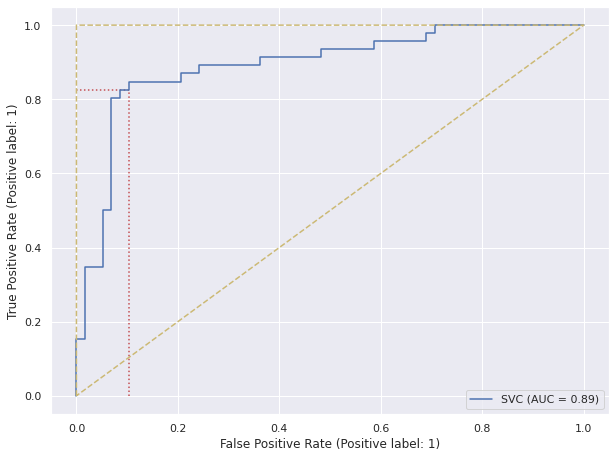

In [ ]:
new_th = best_thresh

RocCurveDisplay.from_estimator(modelo_SVM, Xpt, ytest)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(best_TPrate, 0, best_FPrate, colors='r', linestyles='dotted')  
plt.vlines(best_FPrate, 0, best_TPrate, colors='r', linestyles='dotted')  

Para ejemplificarlo mejor, obtenemos la grafica de precision vs recall, donde identificamos el threshold obtenido:

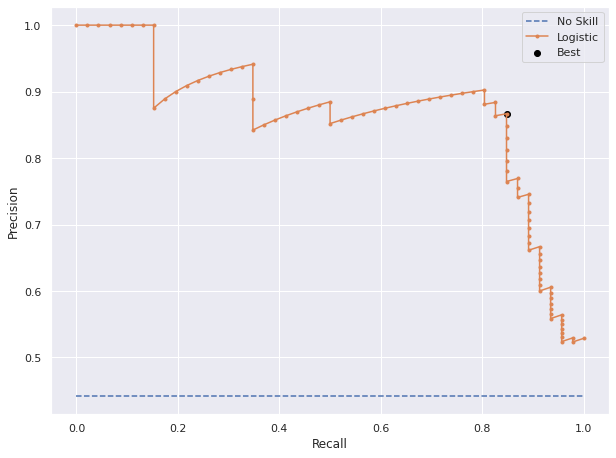

In [ ]:
no_skill = len(ytest[ytest==1]) / len(ytest)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean. 

Utilizamos la metrica de roc_curve() para obtener los false positive rate, true positive rate, y sus respectivoso thresholds:

In [ ]:
# Obtenemos las predicciones del modelo:
yhat = modelo_SVM.predict_proba(Xpt)
yhat = yhat[:, 1]

# Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr) y los thresholds:
fpr, tpr, thresholds = metrics.roc_curve(ytest, yhat)

Sabemos que gmean = sqrt(sensivity*specificity). Donde sensivity=TP/(TP+FN), y specificity=TN/(FP+TN). Por lo que sensivity equivale a la true positive rate, y specificity equivale a 1 – false positive rate. Sustituyendo, obtenemos que gmean = sqrt(TPr * (1-FPr))

Obteniendo ahora los gmean de cada threshold, seleccionamos el que nos de el valor mayor, y obtenemos sus respectivos TPrate y FPrate:

In [ ]:
gmean = np.sqrt(tpr*(1-fpr))
ix = np.argmax(gmean)

best_thresh = thresholds[ix]
best_TPrate = fun_thTPrate(best_thresh, modelo_SVM, Xpt, ytest.to_frame())
best_FPrate = fun_thFPrate(best_thresh, modelo_SVM, Xpt, ytest.to_frame())

print('Best Threshold = %f' % (best_thresh))
print('Best TPrate = %f' % (best_TPrate))
print('Best FPrate = %f' % (best_FPrate))

Best Threshold = 0.376260
Best TPrate = 0.826087
Best FPrate = 0.103448


Graficamos la curva ROC con el threshold que maximice el valor de gmean:

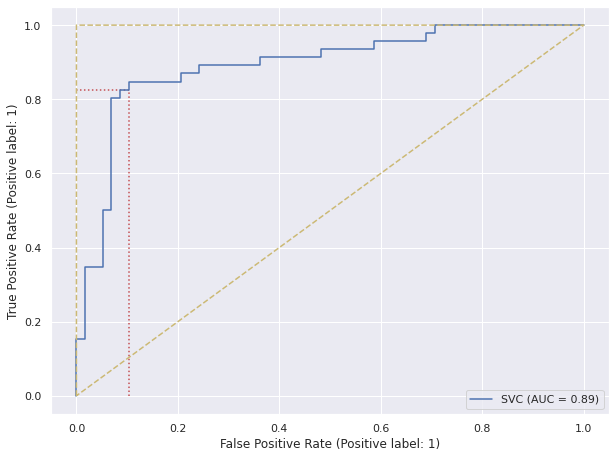

In [ ]:
new_th = best_thresh

RocCurveDisplay.from_estimator(modelo_SVM, Xpt, ytest)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(best_TPrate, 0, best_FPrate, colors='r', linestyles='dotted')  
plt.vlines(best_FPrate, 0, best_TPrate, colors='r', linestyles='dotted')  

#**Ejercicio-10.**

Incluye tus conclusiones finales de la actividad.

El modelo de maquina de vector soporte (SVM) nos dio un resultado aceptable, hablando de las métricas utilizadas al inicio, o del área bajo la curva en la curva de ROC. Se obtuvieron:

* Mejor valor de Accuracy obtenido con la mejor combinación de parametros para accuracy: 0.8578202713795934
* Mejor valor de f1_score obtenido con la mejor combinación de parametros para accuracy: 0.8401362280150738
* Mejor valor de precision obtenido con la mejor combinación de parametros para accuracy: 0.8410450649898584
* Mejor valor de recall obtenido con la mejor combinación de parametros para accuracy: 0.8416787614900823
* SVC área bajo la curva: 0.89

Así mismo, nuestras curvas de aprendizaje, así como las métricas con los datos de prueba, nos muestran que nuestro modelo no esta ni sobreentrenado, ni subentrenado. 

Ahora hablando del threshold, este se puede utilizar para darle prioridad a algún tipo de métrica. Que, en otras palabras, significa tratar de evitar algún tipo de error en especifico al darle mayor importancia. 

Generamos una grafica de splatter para poder visualizar mejor los resultados del modelo:

In [ ]:
pred = modelo_SVM.predict_proba(Xpt)

my0s = (ytest.to_frame()['class']==0)   # Se genera el vector Booleano, my0s, con TRUE para las entradas con 0s y FALSE para los 1s. Buscamos quedarnos solo con los negativos.
my1s = (ytest.to_frame()['class']==1)   # De manera complemtaria, ahora "my1s" es el vector Booleanco con TRUE para los 1s - FALSE para los 0s. Ahora buscamos solo los positivos.

pred0s  = pred[my0s][:,1]
pred1s  = pred[my1s][:,1]

r0 = np.random.uniform(-0.442,0.442, size=pred0s.shape[0])    # Generamos aleatorios uniforme para el eje x
r1 = np.random.uniform(0.558,1.442, size=pred1s.shape[0])     # El análogo para 1-TRUEs de Xtest

Donde definimos la línea punteada verde como el threshold de 0.5, y la línea punteada roja como el threshold de 0.37 obtenido en el ejercicio 8 y 9:

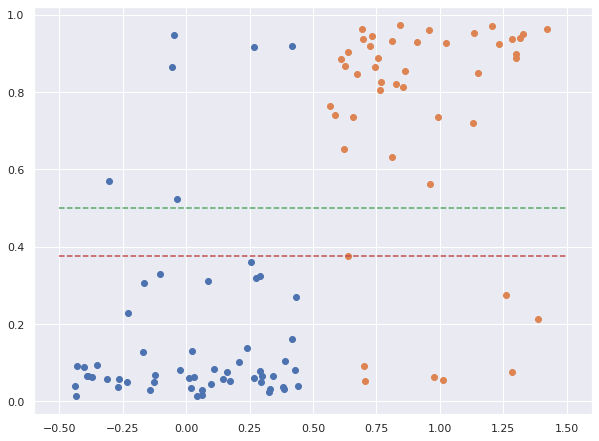

In [ ]:
plt.scatter(x=r0, y=pred0s)   # En teoría todos estos debieran ser menores a 0.5.
plt.scatter(x=r1, y=pred1s)   # Y todos estos debieran ser mayores a 0.5.

plt.hlines(0.5, -0.5, 1.5, color='g', linestyles='dashed')
plt.hlines(0.375249, -0.5,1.5,color='r',linestyles='dashed')

plt.show()

Donde dividiendo la grafica en 4 cuadrantes, divididos por la línea de threshold, arriba a la derecha son TP, arriba a la izquierda FP, abajo a la izquierda TN, y abajo a la derecha FN. 

Lo que podemos observar es que el threshold al 0.5 nos da prácticamente los mismos resultados que el threshold obtenido. La diferencia es que posiciona a un valor de la clase 1 en la frontera. Esto se interpreta, y se confirma, checando el balanceo de clases. Donde se observa que las clases están balanceadas:


In [ ]:
data['class'].sum() / data['class'].shape[0]

0.4449275362318841

Mientras que se puede modificar el threshold para buscar maximizar o minimizar algún tipo de error o acierto, para las metricas f1-score y gmean, el threshold que maximiza sus resultados resulto ser el mismo en este caso. 

Referencias:

* A Gentle Introduction to Threshold-Moving for Imbalanced Classification. (2020). Retrieved from Machine Learning Mastery: [https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

###**Fin de la Actividad de la semana 8.**